In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Mary\Anaconda3\envs\rr

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |             py_1           8 KB  conda-forge/label/gcc7
    mkl-2020.0                 |              166        98.9 MB
    ------------------------------------------------------------
                                           Total:        99.0 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/win-64::blas-1.0-mkl
  cycler             conda-forge/label/gcc7/noarch::cycler-0.10.0-py_1
  freetype           pkgs/main/win-64::freetype-2.9.1-ha9979f8_1
  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  icu                pkgs/main/win-64::icu-58.2-ha66f8fd_1
  intel-openmp       pkgs/main/win-64::intel-openm



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [40]:
import pandas as pd
import numpy as np
import numpy
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
path = 'REPORCOL.csv'
df = pd.read_csv(path, error_bad_lines=False,delimiter = ';')
df.head()

C:\Users\Mary\Anaconda3\envs\rr\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,POLOZA,COBERTURA,RAMO,MODA,AO_POLIZA,SEXO,EDAD_CALC,NO_ASEG,PMAVALUAR,SA_PREVIA,...,TIEMPO,C_EXT,C_DIV,FP_POLIZA,PLAN,IGC,F_EMI,NOMBREPLAN,DESC_EDO,DIVISION
0,"1,50041E+12",BASICA,150,606,5,M,62,1,"3380,75",250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
1,"1,50041E+12",BASICA,150,606,5,F,58,2,"1778,25",250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
2,"1,50041E+12",BASICA,150,606,5,M,59,3,"2544,5",250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
3,"1,50041E+12",BASICA,150,606,5,M,44,4,"753,25",250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
4,"1,50041E+12",BASICA,150,606,5,M,54,5,"1632,25",250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE


In [6]:
#Conocemos los nombres de las columnas
df.columns.values.tolist()

['POLOZA',
 'COBERTURA',
 'RAMO',
 'MODA',
 'AO_POLIZA',
 'SEXO',
 'EDAD_CALC',
 'NO_ASEG',
 'PMAVALUAR',
 'SA_PREVIA',
 'SAVIGOR',
 'CODIGO',
 'FP_DIV',
 'PORC_PROF',
 'PORC_ENF',
 'MONEDA',
 'ADMON',
 'ESTADO',
 'COD_DIV',
 'SIN_PAG',
 'DIV_PAG',
 'PMA_ANUAL',
 'F_VIG',
 'F_NAC',
 'EXP',
 'TIEMPO',
 'C_EXT',
 'C_DIV',
 'FP_POLIZA',
 'PLAN',
 'IGC',
 'F_EMI',
 'NOMBREPLAN',
 'DESC_EDO',
 'DIVISION']

In [7]:
#conocemos el tipo de informacioón que alberga cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391925 entries, 0 to 391924
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   POLOZA      391925 non-null  object
 1   COBERTURA   391925 non-null  object
 2   RAMO        391925 non-null  int64 
 3   MODA        391925 non-null  int64 
 4   AO_POLIZA   391925 non-null  int64 
 5   SEXO        391925 non-null  object
 6   EDAD_CALC   391925 non-null  int64 
 7   NO_ASEG     391925 non-null  int64 
 8   PMAVALUAR   391925 non-null  object
 9   SA_PREVIA   391925 non-null  int64 
 10  SAVIGOR     391925 non-null  int64 
 11  CODIGO      391925 non-null  int64 
 12  FP_DIV      391925 non-null  int64 
 13  PORC_PROF   391925 non-null  object
 14  PORC_ENF    391925 non-null  object
 15  MONEDA      391925 non-null  int64 
 16  ADMON       391925 non-null  object
 17  ESTADO      391925 non-null  int64 
 18  COD_DIV     391925 non-null  int64 
 19  SIN_PAG     391925 non-

In [8]:
#Vemos si existen valores nulos
df.isnull().any().any()

False

In [49]:
#No hay valores nulos pero tomamos como nulo aque con campos llenos con 0 o 'N'
df.replace({'0': np.nan}, inplace=True)
df.replace({'n': np.nan}, inplace=True)
df.replace({'nan': np.nan}, inplace=True)

In [10]:
#Verificamos nuevamente
df.isnull().any().any()

True

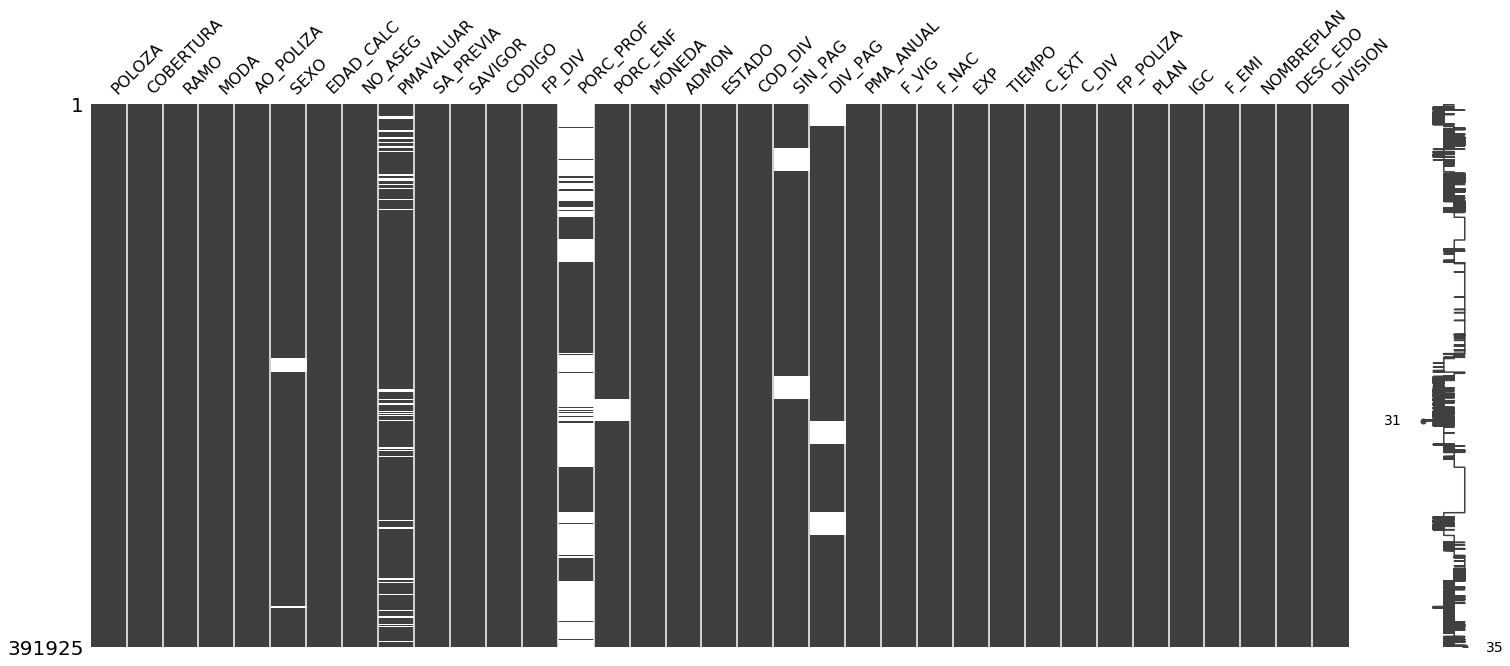

In [50]:
#Graficamos nuestros datos para ver que tan relevantes son los espacion vaciossurveys_df['weight'].describe()
msno.matrix(df)

In [ ]:
# Estadísticas para todas las columnas numéricas por sexo
grouped_data.describe()
# Regresa la media de cada columna numérica por sexo
grouped_data.mean()

In [15]:
#Calculamos las estadísticas del ramo al que pertenecen las variables 
df['RAMO'].describe()


count    391925.000000
mean        159.997091
std           0.170525
min         150.000000
25%         160.000000
50%         160.000000
75%         160.000000
max         160.000000
Name: RAMO, dtype: float64

In [21]:
#Calculamos las estadísticas de LA EDAD al que pertenecen las variables 
df['EDAD_CALC'].describe()


count    391925.000000
mean         39.081707
std          11.274801
min          12.000000
25%          30.000000
50%          39.000000
75%          45.000000
max          96.000000
Name: EDAD_CALC, dtype: float64

In [25]:
#Calculamos las estadísticas del estado al que pertenecen las variables 
df['ESTADO'].describe()


count    391925.000000
mean         15.533133
std           9.767772
min           1.000000
25%           8.000000
50%          13.000000
75%          27.000000
max          31.000000
Name: ESTADO, dtype: float64

In [23]:
list(df['COBERTURA'].unique())

['BASICA', 'IMA', 'IPO', 'DIAC', 'BIT-V', 'BITP', 'BIT-T', 'BITPA']

In [30]:
df['COBERTURA'].replace({"BASICA": 1,
                         "IMA": 2,
                         "IPO": 3,
                         "DIAC":4,
                         "BIT-V":5,
                         "BITP":6,
                         "BIT-T":7,
                         "BITPA":8}, inplace=True)

In [31]:
list(df['COBERTURA'].unique())

[1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
#Calculamos las estadísticas del estado al que pertenecen las variables 
df['COBERTURA'].describe()

count    391925.000000
mean          2.299723
std           1.956516
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: COBERTURA, dtype: float64

In [51]:

list(df['SEXO'].unique())


['M', 'F', nan]

In [61]:
df['SEXO'].replace({"M": 1,
                         "F": 2,
                         "nan": 3}, 
                    inplace=True)

In [72]:
list(df['EDAD_CALC'].unique())

[62,
 58,
 59,
 44,
 54,
 55,
 56,
 48,
 61,
 52,
 51,
 38,
 50,
 41,
 35,
 49,
 31,
 40,
 68,
 42,
 43,
 53,
 30,
 47,
 32,
 46,
 28,
 37,
 72,
 26,
 39,
 63,
 45,
 34,
 33,
 57,
 36,
 29,
 25,
 27,
 21,
 17,
 23,
 64,
 24,
 65,
 60,
 82,
 19,
 76,
 66,
 67,
 70,
 22,
 71,
 80,
 74,
 69,
 81,
 75,
 18,
 20,
 77,
 83,
 73,
 16,
 78,
 79,
 96,
 89,
 86,
 15,
 84,
 87,
 85,
 88,
 91,
 94,
 90,
 92,
 93,
 95,
 12,
 14,
 13]